In [6]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from glob import glob

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '../../images/dl_eeeh_dataset/train'
valid_path = '../../images/dl_eeeh_dataset/test'

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

# useful for getting number of classes
folders = glob('../../images/dl_eeeh_dataset/train/*')

# our layers - you can add more if you want
x = Flatten()(vgg.output)
#x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [7]:
from keras.preprocessing.image import ImageDataGenerator

# tell the model what cost and optimization method to use
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical')



Found 276 images belonging to 2 classes.
Found 31 images belonging to 2 classes.


In [8]:
# fit the model
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=5,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

/var/folders/z2/rc11yvz52y5f0wwtxzjqbdm80000gn/T/ipykernel_36782/549315001.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
9/9 [==============================] - 22s 2s/step - loss: 0.6825 - accuracy: 0.7754 - val_loss: 1.6111 - val_accuracy: 0.5161
Epoch 2/5
9/9 [==============================] - 21s 2s/step - loss: 0.4476 - accuracy: 0.8043 - val_loss: 0.6857 - val_accuracy: 0.6452
Epoch 3/5
9/9 [==============================] - 21s 2s/step - loss: 0.2763 - accuracy: 0.8732 - val_loss: 0.1646 - val_accuracy: 0.9677
Epoch 4/5
9/9 [==============================] - 21s 2s/step - loss: 0.1871 - accuracy: 0.9167 - val_loss: 0.3792 - val_accuracy: 0.7742
Epoch 5/5
9/9 [==============================] - 22s 2s/step - loss: 0.1247 - accuracy: 0.9384 - val_loss: 0.3210 - val_accuracy: 0.8710


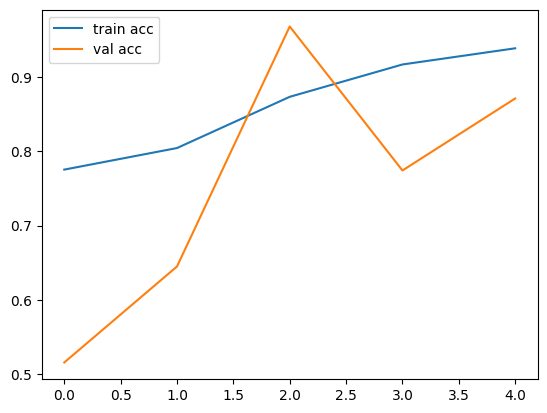

<Figure size 640x480 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


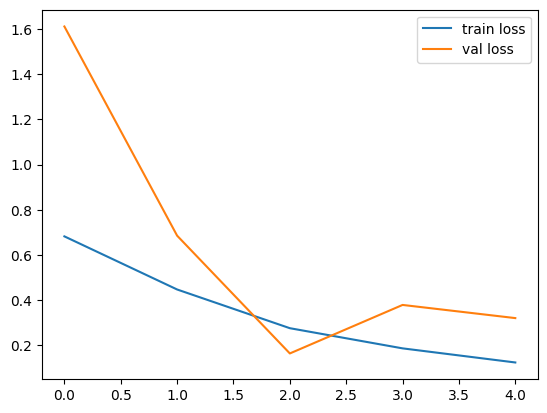

In [10]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
